---
jupytext:
  cell_metadata_filter: -all
  formats: md:myst
  text_representation:
    extension: .md
    format_name: myst
    format_version: 0.13
    jupytext_version: 1.11.5
kernelspec:
  display_name: Python 3
  language: python
  name: python3
---


# K-Means clustering

In this section, you will learn how to create clusters using Scikit-learn and the Nigerian music dataset you imported earlier. We will cover the basics of K-Means for Clustering. Keep in mind that, as you learned in the earlier section, there are many ways to work with clusters and the method you use depends on your data. We will try K-Means as it's the most common clustering technique. Let's get started!

Terms you will learn about:

- Silhouette scoring
- Elbow method
- Inertia
- Variance 

## Introduction

K-Means Clustering is a method derived from the domain of signal processing. It is used to divide and partition groups of data into 'k' clusters using a series of observations. Each observation works to group a given datapoint closest to its nearest 'mean', or the center point of a cluster.

The clusters can be visualized as Voronoi diagrams, which include a point (or 'seed') and its corresponding region. 

:::{figure} https://static-1300131294.cos.ap-shanghai.myqcloud.com/images/clustering/voronoi.png
---
name: voronoi diagram
---
voronoi diagram infographic by Jen Looper
:::

In [1]:
# Install the necessary dependencies

import os
import sys
!{sys.executable} -m pip install --quiet pandas scikit-learn numpy matplotlib jupyterlab_myst ipython seaborn

In [2]:
from IPython.display import HTML
display(HTML("""
<p style="text-align: center;">
<iframe src="https://static-1300131294.cos.ap-shanghai.myqcloud.com/html/clustering-vis/clustering.html" width="105%" height="800px;"
style="border:none;" scrolling="auto"></iframe>
A demo of linear-regression. <a
href="https://www.naftaliharris.com/blog/visualizing-k-means-clustering/"> [source]</a>
</p>
"""))


The K-Means clustering process executes in a three-step process):

- The algorithm selects k-number of center points by sampling from the dataset. After this, it loops:

1. It assigns each sample to the nearest centroid.
2. It creates new centroids by taking the mean value of all of the samples assigned to the previous centroids.
3. Then, it calculates the difference between the new and old centroids and repeats until the centroids are stabilized.

One drawback of using K-Means includes the fact that you will need to establish 'k', that is the number of centroids. Fortunately the  'elbow method' helps to estimate a good starting value for 'k'. You'll try it in a minute.

## Prerequisite

You will work in this section's _notebook.ipynb_ file that includes the data import and preliminary cleaning you did in the last section.

## Exercise - preparation

Start by taking another look at the songs data.

Text(0.5, 1.0, 'Top genres')

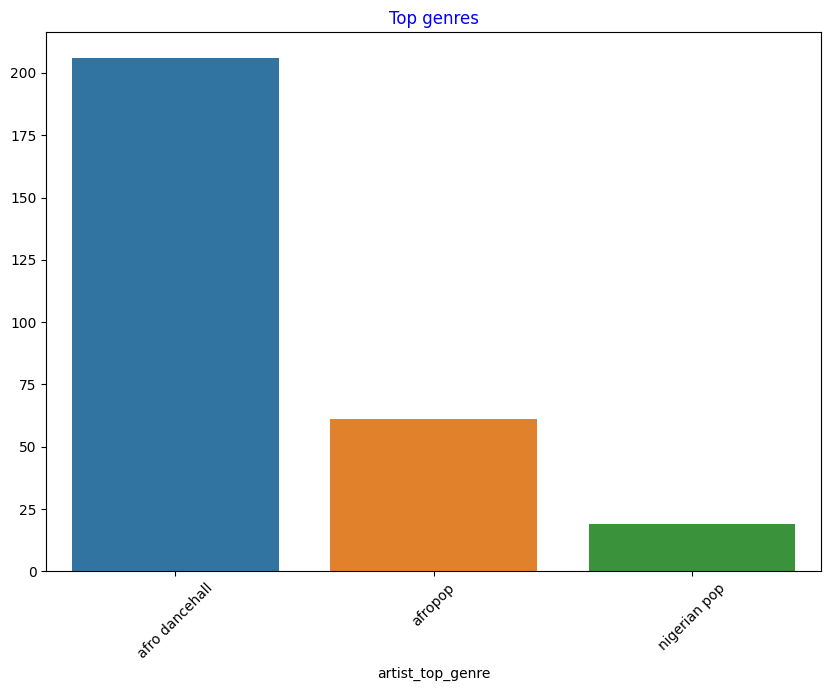

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


df = pd.read_csv("https://static-1300131294.cos.ap-shanghai.myqcloud.com/data/nigerian-songs.csv")
df = df[(df['artist_top_genre'] == 'afro dancehall') | (df['artist_top_genre'] == 'afropop') | (df['artist_top_genre'] == 'nigerian pop')]
df = df[(df['popularity'] > 0)]
top = df['artist_top_genre'].value_counts()

plt.figure(figsize=(10,7))
sns.barplot(x=top.index,y=top.values)
plt.xticks(rotation=45)
plt.title('Top genres',color = 'blue')

1. Create a boxplot, calling `boxplot()` for each column:

<Axes: xlabel='release_date'>

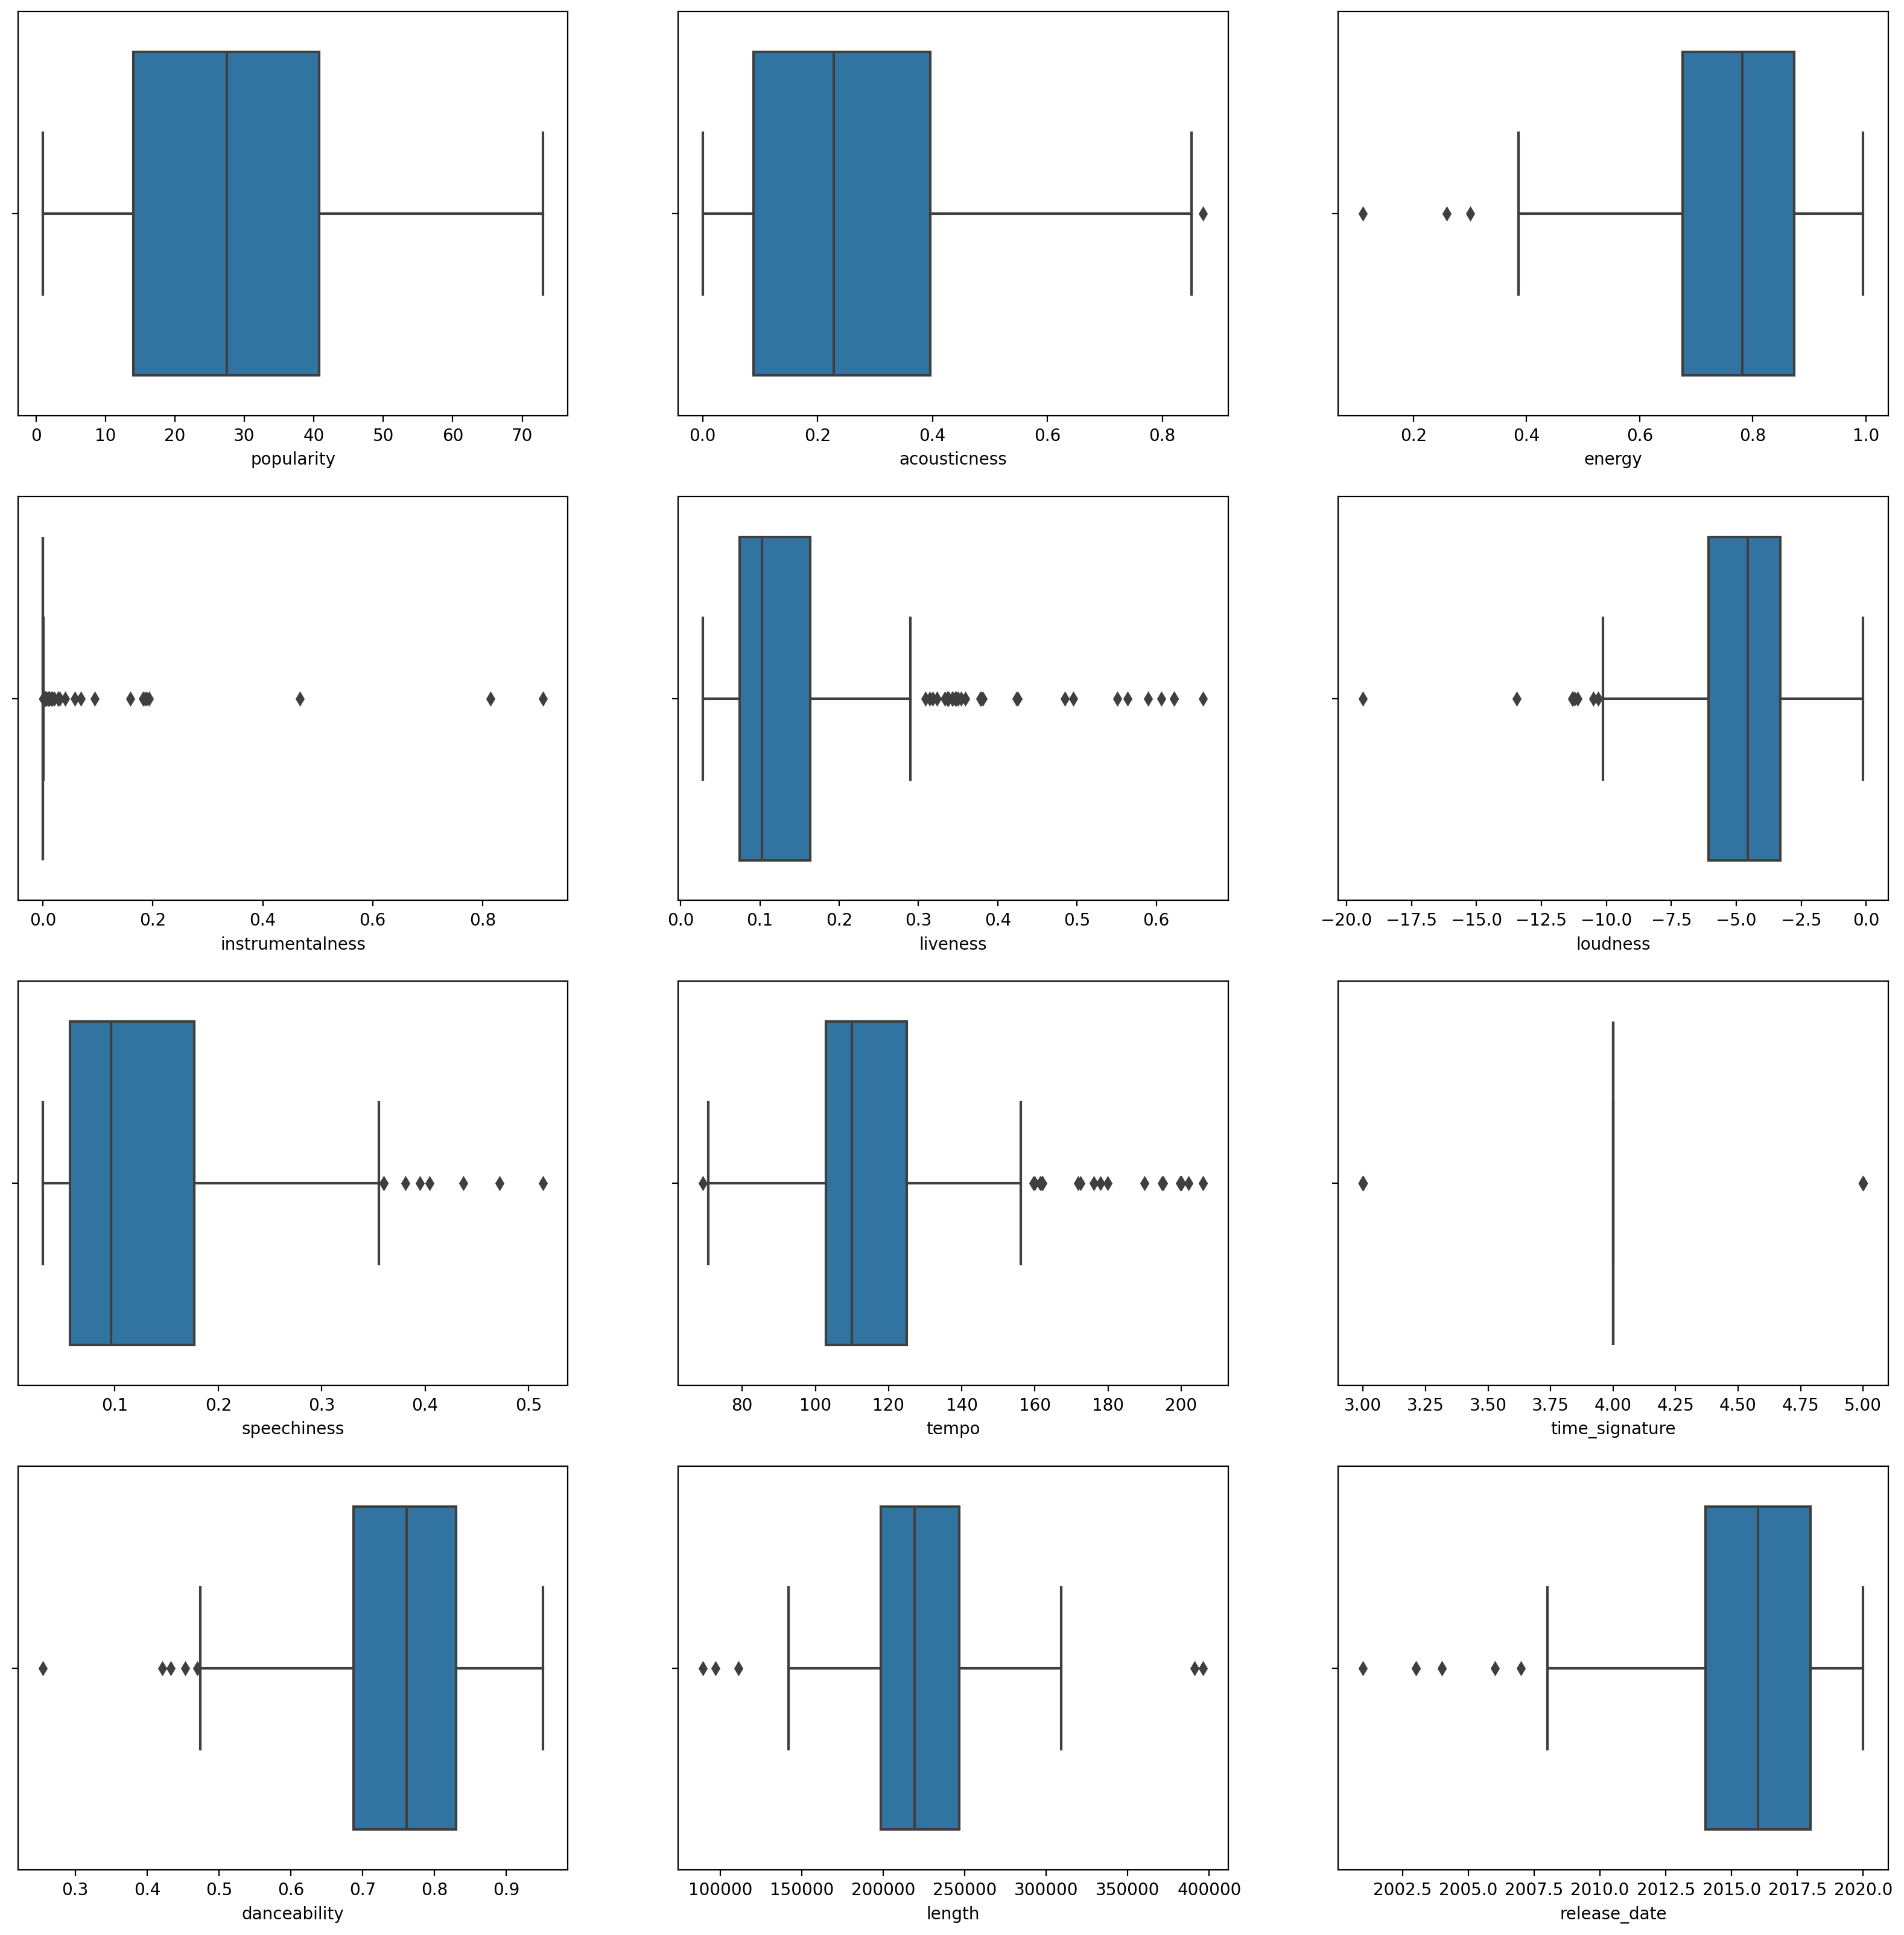

In [4]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="_oldcore")

plt.figure(figsize=(20,20), dpi=200)

plt.subplot(4,3,1)
sns.boxplot(x = 'popularity', data = df)

plt.subplot(4,3,2)
sns.boxplot(x = 'acousticness', data = df)

plt.subplot(4,3,3)
sns.boxplot(x = 'energy', data = df)

plt.subplot(4,3,4)
sns.boxplot(x = 'instrumentalness', data = df)

plt.subplot(4,3,5)
sns.boxplot(x = 'liveness', data = df)

plt.subplot(4,3,6)
sns.boxplot(x = 'loudness', data = df)

plt.subplot(4,3,7)
sns.boxplot(x = 'speechiness', data = df)

plt.subplot(4,3,8)
sns.boxplot(x = 'tempo', data = df)

plt.subplot(4,3,9)
sns.boxplot(x = 'time_signature', data = df)

plt.subplot(4,3,10)
sns.boxplot(x = 'danceability', data = df)

plt.subplot(4,3,11)
sns.boxplot(x = 'length', data = df)

plt.subplot(4,3,12)
sns.boxplot(x = 'release_date', data = df)

This data is a little noisy: by observing each column as a boxplot, you can see outliers.

You could go through the dataset and remove these outliers, but that would make the data pretty minimal.

2. For now, choose which columns you will use for your clustering exercise. Pick ones with similar ranges and encode the `artist_top_genre` column as numeric data:

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

X = df.loc[:, ('artist_top_genre','popularity','danceability','acousticness','loudness','energy')]

y = df['artist_top_genre']

X['artist_top_genre'] = le.fit_transform(X['artist_top_genre'])

y = le.transform(y)

3. Now you need to pick how many clusters to target. You know there are 3 song genres that we carved out of the dataset, so let's try 3:

In [6]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="_oldcore")

nclusters = 3 
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X)

# Predict the cluster for each data point

y_cluster_kmeans = km.predict(X)
y_cluster_kmeans

array([2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 1, 2, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 2, 1, 1, 2, 2, 0, 0, 1, 2, 2, 2, 2, 0, 0, 1, 2, 1, 2, 1,
       2, 1, 1, 0, 0, 2, 0, 1, 1, 2, 2, 2, 2, 0, 0, 1, 0, 2, 2, 0, 2, 2,
       0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 1, 2, 0, 0, 0, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 1,
       0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 1, 0, 2, 0, 2,
       0, 2, 2, 2, 1, 2, 0, 0, 0, 2, 0, 1, 0, 2, 2, 0, 0, 0, 1, 0, 2, 2,
       2, 0, 0, 1, 0, 2, 0, 0, 0, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2,
       1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 0, 0, 2, 1, 2, 2, 1, 2, 2, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 2, 1, 1, 2, 2, 2, 0, 0, 0, 0, 0, 1,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 2, 2, 2,
       0, 0, 1, 1, 0, 0, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 0, 0, 0, 2, 2, 2,
       0, 2, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 1, 0, 2, 0, 0, 0, 2, 0])

You see an array printed out with predicted clusters (0, 1,or 2) for each row of the dataframe.

4. Use this array to calculate a 'silhouette score':

In [7]:
from sklearn import metrics
score = metrics.silhouette_score(X, y_cluster_kmeans)
score

0.5466747351275563

## Silhouette score

Look for a silhouette score closer to 1. This score varies from -1 to 1, and if the score is 1, the cluster is dense and well-separated from other clusters. A value near 0 represents overlapping clusters with samples very close to the decision boundary of the neighboring clusters.

Our score is **.53**, so right in the middle. This indicates that our data is not particularly well-suited to this type of clustering, but let's continue.

### Exercise - build a model

1. Import `KMeans` and start the clustering process.

In [8]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="_oldcore")

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

There are a few parts here that warrant explaining.

:::{seealso} 
🎓 range: These are the iterations of the clustering process

🎓 random_state: "Determines random number generation for centroid initialization."

🎓 WCSS: "within-cluster sums of squares" measures the squared average distance of all the points within a cluster to the cluster centroid.

🎓 Inertia: K-Means algorithms attempt to choose centroids to minimize 'inertia', "a measure of how internally coherent clusters are." The value is appended to the wcss variable on each iteration.

🎓 k-means++: In Scikit-learn you can use the 'k-means++' optimization, which "initializes the centroids to be (generally) distant from each other, leading to probably better results than random initialization.
:::

### Elbow method

Previously, you surmised that, because you have targeted 3 song genres, you should choose 3 clusters. But is that the case?

1. Use the 'elbow method' to make sure.

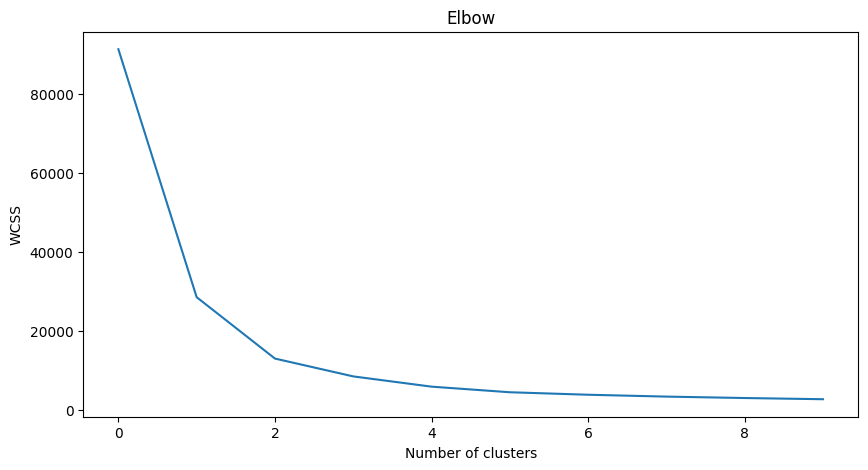

In [9]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="_oldcore")

plt.figure(figsize=(10,5))
sns.lineplot(wcss)
plt.title('Elbow')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

:::{figure} https://static-1300131294.cos.ap-shanghai.myqcloud.com/images/clustering/elbow.png
---
name: elbow
---
:::

Use the `wcss` variable that you built in the previous step to create a chart showing where the 'bend' in the elbow is, which indicates the optimum number of clusters. Maybe it **is** 3!

## Exercise - display the clusters

1. Try the process again, this time setting three clusters, and display the clusters as a scatterplot:

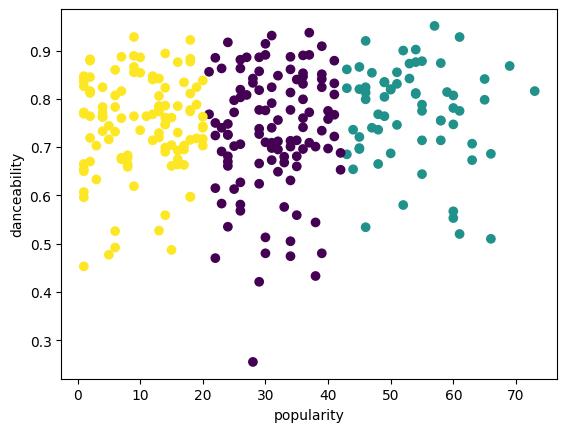

In [10]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="_oldcore")

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
labels = kmeans.predict(X)
plt.scatter(df['popularity'],df['danceability'],c = labels)
plt.xlabel('popularity')
plt.ylabel('danceability')
plt.show()

2. Check the model's accuracy:

In [11]:
labels = kmeans.labels_
correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 112 out of 286 samples were correctly labeled.
Accuracy score: 0.39


This model's accuracy is not very good, and the shape of the clusters gives you a hint why. 

This data is too imbalanced, too little correlated and there is too much variance between the column values to cluster well. In fact, the clusters that form are probably heavily influenced or skewed by the three genre categories we defined above. That was a learning process!

In Scikit-learn's documentation, you can see that a model like this one, with clusters not very well demarcated, has a 'variance' problem:

:::{figure} https://static-1300131294.cos.ap-shanghai.myqcloud.com/images/clustering/problems.png
---
name: problem models
---
roblem models by Scikit-learn
:::

## Variance

Variance is defined as "the average of the squared differences from the Mean" . In the context of this clustering problem, it refers to data that the numbers of our dataset tend to diverge a bit too much from the mean. 

:::{seealso} 
This is a great moment to think about all the ways you could correct this issue. Tweak the data a bit more? Use different columns? Use a different algorithm? Hint: Try scaling your data to normalize it and test other columns.
:::

## Your turn! 🚀

TBD.

## Self study

You can use this tool to visualize sample data points and determine their centroids.

- [such as this one](https://user.ceng.metu.edu.tr/~akifakkus/courses/ceng574/k-means/)
- [this handout on K-Means](https://stanford.edu/~cpiech/cs221/handouts/kmeans.html)
- [another K-means clustering visualization](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/)

## Acknowledgments

Thanks to Microsoft for creating the open-source course [Machine Learning for Beginners](https://github.com/microsoft/ML-For-Beginners). It inspires the majority of the content in this chapter.